# Rigid Body Transformations

Import libraries

In [1]:
from context import transforms2d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2D
### Rotation
#### Points
The 2D rotation matrix, denoted by $R$, represents a transformation that rotates a 2D vector in the counterclockwise direction by an angle $\theta$. It can be defined as:

$$
R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

This is an **active** rotation matrix. The **passive** rotation matrix is the inverse/transpose of the active rotaiton matrix. For more details see [active and passive transforms](https://en.wikipedia.org/wiki/Active_and_passive_transformation).

When applied to a 2D vector, the rotation matrix $R$ transforms the vector by rotating it counterclockwise by an angle $\theta$ about the origin:

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

where $(x,y)$ are the coordinates of the original point and $(x',y')$ are the coordinates of the rotated point.

In the example below, a point at (2,1) is rotated by $\theta=30$ degrees about the origin to (1.23, 1.87).

30 degree rotation matrix:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
Original point:
[2 1]
Rotated point:
[1.23205081 1.8660254 ]


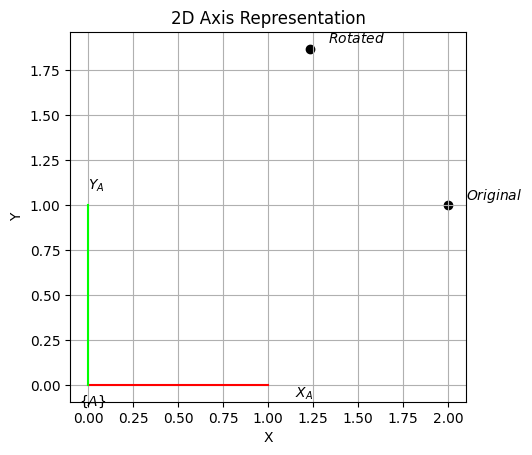

In [2]:
# define rotation
theta  = np.deg2rad(30)
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta),  np.cos(theta)]])

print('30 degree rotation matrix:')
print(R)

# Create a point
p_original = np.array([2,1])
print('Original point:')
print(p_original)

# Rotate the point
p_rotated = R @ p_original
print('Rotated point:')
print(p_rotated)

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the reference frame A
a = transforms2d.Transform2D(0, 0, np.deg2rad(0))
a.plot(ax=ax, frame="A")

# Plot the points
transforms2d.plot_point(ax=ax, p=p_original, frame="Original")
transforms2d.plot_point(ax=ax, p=p_rotated, frame="Rotated")

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Axis Representation')
ax.set_aspect('equal')
ax.grid(True)

# Show the plot
plt.show()

#### Frames and Rotations

Rotations are a key tool for describing relationships between reference frames.

The example below introduces reference frame $A$ and a new frame $B$, which is rotated 30 degrees counterclockwise with respect to frame $A$. The rotation matrix $^{A}R_{B}$:

1. Is **expressed** as the rotation of frame $B$ (the child frame) with respect to frame $A$ (the parent frame).
2. **Operates** to rotate a point defined in frame $B$ to a point defined in frame $A$.

To rotate a point from frame $B$ to frame $A$, the following notation is used:
$$ ^{A}p = ^{A}R_{B} \cdot ^{B}p $$

This can also be written as:
$$
\begin{bmatrix}
^{A}x \\
^{A}y
\end{bmatrix}
=
^{A}R_{B}
\begin{bmatrix}
^{B}x \\
^{B}y
\end{bmatrix}
$$

Notice how the subscripts and superscripts align to "cancel out." To rotate a point from $B$ frame coordinates to $A$ frame coordinates, we use the matrix $^{A}R_{B}$. Since rotation matrices are orthonormal, the transpose of $^{A}R_{B}$ can be used to rotate points in the reverse direction, from $A$ to $B$.

See the example below for details on how a point (2,1) in frame $B$ coordinates is rotated to frame $A$ coordinates of (1.2, 1.9):


30 degree rotation matrix:
[[ 0.8660254 -0.5      ]
 [ 0.5        0.8660254]]
Point in A:
[1.23205081 1.8660254 ]
Point in B:
[2 1]


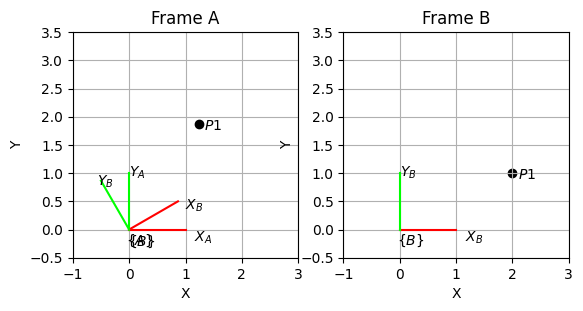

In [3]:
# Reference frame A
a = transforms2d.Transform2D(0, 0, np.deg2rad(0))

# Transformation/Pose (rotation only for now) of frame B with respect
# to frame A
theta  = 30  # degrees
T_ab = transforms2d.Transform2D(0, 0, np.deg2rad(theta))

print('30 degree rotation matrix:')
print(T_ab.as_matrix()[0:2, 0:2])  # Display the rotation matrix component of T_ab

# Create a point defined in frame B
p_b = np.array([2, 1, 1])  # homogeneous coordinates

# Rotate the point from frame B to frame A
# p_a = T_ab @ p_b
p_a = T_ab.as_matrix() @ p_b

print('Point in A:')
print(p_a[0:2])
print('Point in B:')
print(p_b[0:2])

# Create a figure and axes
fig, ax = plt.subplots(1, 2)

# Plot coordinate frames in A and point in A
a.plot(ax=ax[0], frame="A")
T_ab.plot(ax=ax[0], frame="B")
transforms2d.plot_point(ax=ax[0], p=p_a, frame="P1")

# Plot coordinate frame B  and point in frame B
a.plot(ax=ax[1], frame="B")
transforms2d.plot_point(ax=ax[1], p=p_b, frame="P1")

# Add labels and title
ax[0].set_title('Frame A')
ax[1].set_title('Frame B')

for axis in ax:
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_aspect('equal')
    axis.grid(True)
    axis.set_xlim(-1, 3)
    axis.set_ylim(-0.5, 3.5)

# Show the plot
plt.show()

### Translation
Mathematically translation is just vector addition. Given $^{A}p = \begin{bmatrix} ^A{x} \\ ^A{y} \end{bmatrix}$ and $^{B}p = \begin{bmatrix} ^B{x} \\ ^B{y} \end{bmatrix}$
$$ ^{A}p = ^B{p} + \begin{bmatrix} x \\ y \end{bmatrix}$$

### Transformation
Rotation and translation can be combined into a single transformation or pose.

#### Homogeneous Transformation Matrix
This pose can be represented as a homogeneous transformation matrix which is part of the Special Euclidean group SE(2).
$$
T = \begin{bmatrix} \cos(\theta) & -\sin(\theta) & {x} \\ \sin(\theta) & \cos(\theta) & {y} \\ 0 & 0 & 1 \end{bmatrix}
$$

$$
T = \begin{bmatrix} R & t \\ 0_{1x2} & 1 \end{bmatrix}
$$

##### Composition
$$
T = T_{1} \cdot T_{2} = \begin{bmatrix} R_{1} & t_{1} \\ 0_{1x2} & 1 \end{bmatrix} \cdot \begin{bmatrix} R_{2} & t_{2} \\ 0_{1x2} & 1 \end{bmatrix} = \begin{bmatrix} R_{1} \cdot R_{2} & R_{1} \cdot t_{2} + t_{1} \\ 0_{1x2} & 1 \end{bmatrix}
$$

##### Inversion
$$
T^{-1} = \begin{bmatrix} R & t \\ 0_{1x2} & 1 \end{bmatrix}^{-1} = \begin{bmatrix} R^{-1} & -R^{-1} \cdot t \\ 0_{1x2} & 1 \end{bmatrix}
$$

##### Transform a point with the homogeneous transformation matrix
Similar to rotating a point with $^{A}R_{B}$, translation can also be added where $ ^{A}t_{B} = \begin{bmatrix} x \\ y \end{bmatrix}$ is the position of coordinate frame $B$ with respect to $A$ with
$$
^{A}T_{B} = \begin{bmatrix} ^{A}R_{B} & ^{A}t_{B} \\ 0_{1x2} & 1 \end{bmatrix}
$$
This represents the pose of frame $B$ with respect to frame $A$. This will also transfrom a point in frame $B$ into a point in frame $A$:

$$
^{A}p = ^{A}T_{B} \cdot ^{B}p
$$

By using the inverse, a point in frame $A$ can be transformed into a point in frame $B$:
$$
^{B}p = ^{B}T_{A} \cdot ^{A}p
$$

##### Transform a point without the homogeneous transformation matrix
Under the hood of the matrix multiplicaton of $^{A}T_{B} \cdot ^{B}p$ we can see that there are really two operation happening, (1) rotating the point in ${B}$ by $^{A}R_{B}$ and then (2) adding the result to the translation of ${B}$ with respect to ${A}$, $^{A}t_{B}$:
$$
^{A}p = ^{A}R_{B} \cdot ^{B}p + ^{A}t_{B}
$$

When dealing with transformations without a homogenous transformation matrix, it useful to use matrix algebra. For example, the solution for $^{B}p$ can be obtained by rearranging the equation above as follows:

$$
^{A}p - ^{A}t_{B} = ^{A}R_{B} \cdot ^{B}p
$$

Next, we can multiply both sides by the inverse of $^{A}R_{B}$ to cancel out the rotation:

$$
(^{A}R_{B})^{-1} \cdot (^{A}p - ^{A}t_{B}) = (^{A}R_{B})^{-1} \cdot (^{A}R_{B} \cdot ^{B}p)
$$

Simplifying further, we get:

$$
(^{A}R_{B})^{-1} \cdot (^{A}p - ^{A}t_{B}) = ^{B}p
$$

Therefore, the solution for $^{B}p$ is:

$$
^{B}p = (^{A}R_{B})^{-1} \cdot (^{A}p - ^{A}t_{B})
$$
$$
^{B}p = ^{B}R_{A} \cdot (^{A}p - ^{A}t_{B})
$$



##### Change of coordinates example
Below is an example of using SE2 transformations to represent a point in two coordinate frames

Transformation matrix of B relative to A:
[[ 0.8660254 -0.5        2.       ]
 [ 0.5        0.8660254  1.       ]
 [ 0.         0.         1.       ]]
Point in A:
[2 2]
Point in B:
[0.5       0.8660254]
Point in B (without using T):
[0.5       0.8660254]


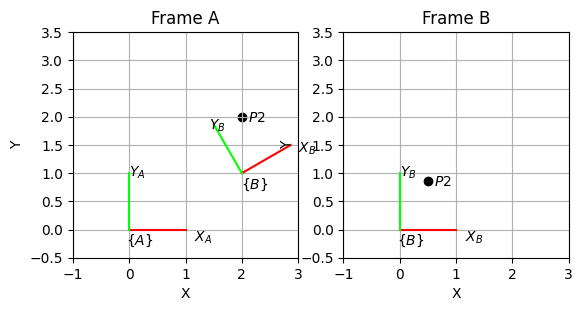

In [4]:
# Create a figure and ax[0]es
fig, ax = plt.subplots(1, 2)

# Reference frame A
a = transforms2d.Transform2D(0, 0, np.deg2rad(0))

# Transformation/Pose of frame B with respect
# to frame A
theta  = 30 # degrees
T_ab = transforms2d.Transform2D(2, 1, np.deg2rad(theta))

print('Transformation matrix of B relative to A:')
print(T_ab.as_matrix())

# Create a point defined in frame A
p_a = np.array([2,2,1]) # homogeneous coordinates

# Transform the point from frame A to frame B
# p_b = T_ba @ p_a. Since we only have T_ab we need to invert it first.
# This inversion is equivalent to a passive transform, which is used for
# changing frames while keeping the point fixed.
T_ba = T_ab.inverse()
p_b = T_ba.as_matrix() @ p_a

# Do the same as above but without using the homogeneous transformation matrix T_ab
# i.e. p_b2 = R_ba @ (p_a - t_ab)
p_b2 = T_ab.inverse().as_matrix()[0:2,0:2] @ (p_a[0:2] - T_ab.as_matrix()[0:2,2])

print('Point in A:')
print(p_a[0:2])
print('Point in B:')
print(p_b[0:2])
print('Point in B (without using T):')
print(p_b2)

# Plot coordinate frames in  and point in frame A
a.plot(ax=ax[0], frame="A")
T_ab.plot(ax=ax[0], frame="B")
transforms2d.plot_point(ax=ax[0], p=p_a, frame="P2")

# Plot coordinate frame B and point in frame B
a.plot(ax=ax[1], frame="B")
transforms2d.plot_point(ax=ax[1], p=p_b, frame="P2")

# Add labels and title
ax[0].set_title('Frame A')
ax[1].set_title('Frame B')

for axis in ax:
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_aspect('equal')
    axis.grid(True)
    axis.set_xlim(-1, 3)
    axis.set_ylim(-0.5, 3.5)

# Show the plot
plt.show()

##### Compsition Example

Transformation matrix of C relative to A:
[[ 0.96592583 -0.25881905  2.3660254 ]
 [ 0.25881905  0.96592583  2.3660254 ]
 [ 0.          0.          1.        ]]
Point in A:
[3 3]
Point in C:
[0.77645714 0.44828774]


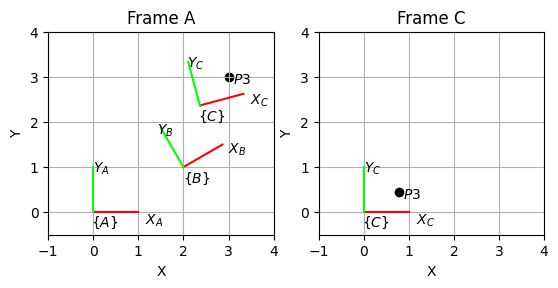

In [5]:
# Create a figure and ax[0]es
fig, ax = plt.subplots(1, 2)

# Reference frame A
a = transforms2d.Transform2D(0, 0, np.deg2rad(0))

# Transformation/Pose of frame B with respect
# to frame A
theta  = 30 # degrees
T_ab = transforms2d.Transform2D(2, 1, np.deg2rad(theta))

theta  = -15 # degrees
T_bc = transforms2d.Transform2D(1, 1, np.deg2rad(theta))

# Compose
T_ac = T_ab.compose(T_bc) # gotta clean this all up

print('Transformation matrix of C relative to A:')
print(T_ac.as_matrix())

# Create a point defined in frame A
p_a = np.array([3,3,1]) # homogeneous coordinates

# Rotate the point from frame C to frame A
# p_C = T_ca @ p_a. Since we only have T_ab we need to transpose it
# This inversion is equivalent to a passive transform, which is used for
# changing frames while keeping the point fixed.
T_ca = T_ac.inverse()
p_c = T_ca.as_matrix() @ p_a

print('Point in A:')
print(p_a[0:2])
print('Point in C:')
print(p_c[0:2])

# Plot coordinate frames in A
a.plot(ax=ax[0], frame="A")
T_ab.plot(ax=ax[0], frame="B")
T_ac.plot(ax=ax[0], frame="C")

# Plot the point in A
transforms2d.plot_point(ax=ax[0], p=p_a, frame="P3")

# Add labels and title
ax[0].set_title('Frame A')

# Plot coordinate frame B in frame B
a.plot(ax=ax[1], frame="C")

# Plot the same point in B
transforms2d.plot_point(ax=ax[1], p=p_c, frame="P3")

# Add labels and title
ax[1].set_title('Frame C')


for axis in ax:
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    axis.set_aspect('equal')
    axis.grid(True)
    axis.set_xlim(-1, 4)
    axis.set_ylim(-0.5, 4)

# Show the plot
plt.show()

## 3D
Rotations and transformations in 3 dimensions follow the same rules. This section will be updated later.

## Notation
Notation for this notebook loosely follows [Robotics, Vision and Control](https://petercorke.com/books/robotics-vision-control-all-versions/) by Peter Corke. See the book for more in depth and higher quality details. In general, rotations, translations, and transformation are of the form $^{A}X_{B}$ where:
* The leading superscript ($^{A}$) denotes the reference coordinate frame
* The subscript ($_{B}$) denotes the frame being described

In the case of a homogeneous transformation matrix, $^{A}T_{B}$ can be described as:
* The pose of frame ${B}$ with respect to frame ${A}$
* Transforms a point in coordinate frame ${B}$ to a point in coordinate frame ${A}$

### Coding Convention
It is important to be clear in the naming of objects representing rigid body motion in code because it easy for names to be ambiguous. For example, while it would be concise to name a variable `T_a2b` it could be interpreted as:

1. The pose of frame ${B}$ with respect to frame ${A}$, i.e. $^{A}T_{B}$
2. Transforms a point from frame ${A}$ to frame ${B}$, i.e. $^{B}T_{A}$

Both interpretations are **valid** but they are also **opposite**. For suggestions on best practices see [
Representing Robot Pose: The good, the bad, and the ugly](https://paulfurgale.info/news/2014/6/9/representing-robot-pose-the-good-the-bad-and-the-ugly).

### ROS `TransformStamped` Message Directionality

In ROS, the [`geometry_msgs/TransformStamped`](https://github.com/ros2/common_interfaces/blob/rolling/geometry_msgs/msg/TransformStamped.msg)message defines a transformation between two coordinate frames:

- `header.frame_id`: the reference (parent) frame
- `child_frame_id`: the target (child) frame

The `transform` field specifies the translation and rotation needed to **express** the child frame relative to the parent frame. This means the transformation describes how to move from the parent frame to the child frame.

However, when applying this transformation to a point or pose, the operation effectively **transforms** data from the child frame into the parent frame's coordinate system. This distinction can be subtle and has led to some confusion in the ROS community.

## Other References
* [Reducing the uncertainty about the uncertainties, part 2: Frames and manifolds](https://gtsam.org/2021/02/23/uncertainties-part2.html): GTSAM blog post covering references frames and Lie Groups